In [56]:
# Demo for 10-18
# Import pre-written script
from analyze import *
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

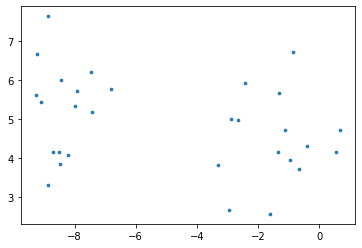

In [57]:
X, y = make_blobs(n_samples=30, centers=2, n_features=2, random_state=7)

plt.scatter(X[:,0], X[:,1], s=7)
#print(X)

Our goal is to hierarchical cluster the data above

In [58]:
class Cluster():
    def __init__(self, identity, location, num_orig):
        self.identity = identity
        self.location = location
        self.num_orig = int(num_orig) 
        
    def __repr__(self):
        return("Cluster(Identity: " + str(self.identity) + ", Location: " +str(self.location)+")")
        
class HiClust():
    def __init__(self, dataset):
        self.dataset = dataset
        
        self.clusters = [Cluster(i, self.dataset[i], 1) for i in range(self.dataset.shape[0])]
        self.counter = len(self.clusters) # We will start counting from size of original data + 1
        self.linkages = []
        
    def link_merge(self, c1, c2, dist):
        # Calculate link details for linkage matrix and add 
        linkage = np.array([c1.identity, c2.identity, dist, c1.num_orig + c2.num_orig])
        self.linkages.append(linkage)
        # Remove old clusters from list
        self.clusters = [i for i in self.clusters if i.identity != c1.identity and i.identity != c2.identity]
        # Create new cluster and add to list
        new_cluster = Cluster(self.counter, np.mean([c1.location, c2.location], axis=0), c1.num_orig+c2.num_orig)
        self.clusters.append(new_cluster)
        self.counter += 1
        
    def iterate(self):
        minimum = float("inf")
        for i in range(len(self.clusters)):
            for j in range(len(self.clusters)):
                if i < j:
                    cand_1 = self.clusters[i]
                    cand_2 = self.clusters[j]
                    dist = np.linalg.norm(cand_1.location - cand_2.location)
                    if dist < minimum:
                        minimum = dist
                        c1 = cand_1
                        c2 = cand_2
        self.link_merge(c1, c2, minimum)
        
    def cluster(self):
        while len(self.clusters) > 1:
            self.iterate()
            print(self.linkages[-1])

In [59]:
hc = HiClust(X)
hc.cluster()

[ 0.         29.          0.19737969  2.        ]
[13.         21.          0.21874013  2.        ]
[ 7.         19.          0.23847866  2.        ]
[12.         30.          0.33491177  3.        ]
[10.         33.          0.35534145  4.        ]
[5.         6.         0.37587509 2.        ]
[20.         24.          0.38837663  2.        ]
[ 4.         17.          0.58518469  2.        ]
[ 9.         15.          0.60874663  2.        ]
[ 8.         35.          0.62331243  3.        ]
[11.         36.          0.62510478  3.        ]
[38.         39.          0.74925275  5.        ]
[ 2.         18.          0.77446961  2.        ]
[40.         42.          0.82517904  5.        ]
[25.         34.          0.88291458  5.        ]
[16.         32.          0.88876988  3.        ]
[14.         45.          0.99719657  4.        ]
[23.         31.          1.00243754  3.        ]
[ 3.        26.         1.1577458  2.       ]
[ 1.         28.          1.19521227  2.        ]
[22.    

/home/dan/env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



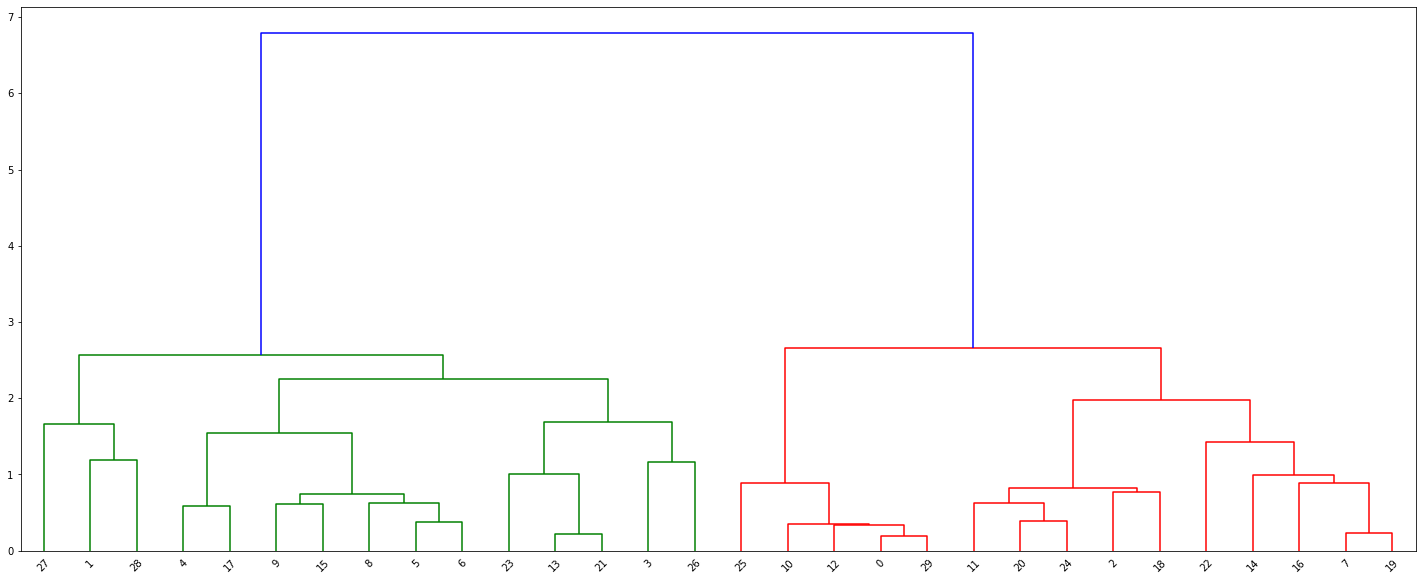

In [60]:
from scipy.cluster.hierarchy import dendrogram

fig = plt.figure(figsize=(25,10))
dn = dendrogram(hc.linkages)
fig.show()

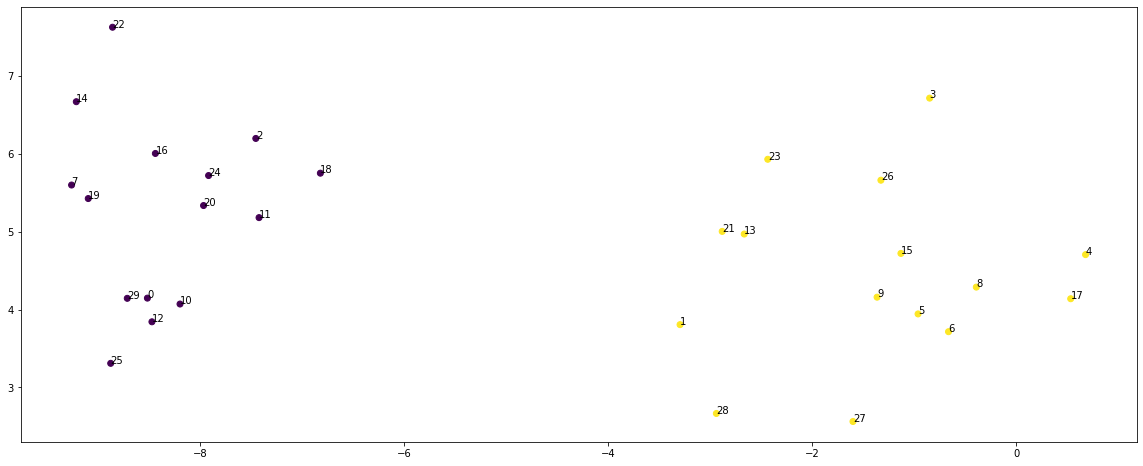

In [61]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(X[:,0], X[:,1], c=y)
for i in range(len(X)):
    ax.annotate(i, (X[i][0], X[i][1]))


In [62]:
data = pickle.load(open("countries.p", "rb"))
countries, counts, tfidf = (data["dataframe"], data["count_matrix"], data["tfidf_matrix"])

In [63]:
country_clusters = HiClust(tfidf)

In [64]:
country_clusters.cluster()

[  9. 132.   0.   2.]
[ 13. 199.   0.   2.]
[ 29. 131.   0.   2.]
[ 39. 195.   0.   2.]
[43. 52.  0.  2.]


KeyboardInterrupt: 

In [72]:
import scipy.cluster.hierarchy as shc 
import plotly.figure_factory as ff

In [73]:
fig = ff.create_dendrogram(tfidf, labels=np.array(countries["Country"]))
fig.update_layout(width=800, height=500)
fig.show()

In [71]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=5)
new_tfidf = lsa.fit_transform(tfidf)
#lsa = TruncatedSVD(n_components=5)
#new_tfidf = lsa.fit_transform(tfidf)
#lsa2 = TruncatedSVD(n_components=5)
#new_counts = lsa.fit_transform(counts)

import plotly.figure_factory as ff
fig = ff.create_dendrogram(new_tfidf, labels=np.array(countries["Country"]))
fig.update_layout(width=800, height=500)
fig.show()

In [45]:
from analyze import *
sp500 = SP500(data="./sp500_processed.p")




Preparing count vectors...
Preparing tf-idf vectors...
Deleting securities with empty 10-K...


In [52]:
sp500.cluster(n_clusters=11, clust_method=AgglomerativeClustering, dim_red=False, method=UMAP, dims=100)

array([ 2,  2,  2,  1, 10,  6,  6,  6,  6,  7,  5,  7,  6,  7,  6,  1,  6,
        8,  6,  6,  2,  2,  6,  9,  0,  5,  5,  5,  6, 10,  9,  1,  9,  6,
        0,  1,  6,  7, 10,  2,  6,  2, 10,  2,  6,  2,  6,  3,  8,  2,  2,
        2,  2,  2,  6,  6,  7,  1,  1,  7, 10, 10,  5,  6,  1,  2,  7,  4,
        2,  0, 10,  0, 10,  6,  2,  6,  7,  6,  2,  8,  6,  6,  6,  7, 10,
        6,  3,  6,  6,  7, 10, 10, 10,  1,  6,  1,  6,  7,  7,  2,  4,  6,
        9,  6,  6,  1,  2,  1,  3,  6,  0,  6,  0,  3,  0,  2,  6,  0,  0,
        6,  7,  6,  9,  6,  6,  2,  1,  0, 10,  3,  3,  9, 10,  6,  7,  2,
       10,  7,  1,  2,  7,  6,  1,  2,  7,  7,  2,  7,  7,  7,  5,  8,  6,
        1,  1,  1,  6, 10,  9,  7,  9,  9,  8,  2, 10,  7,  2,  2,  7,  2,
        9,  6,  6,  2,  9,  3,  6,  6,  8,  8, 10,  9,  9,  0,  9,  4,  6,
        8,  3,  6,  6,  6,  8,  5,  6,  4,  5,  6,  6,  6,  5,  1,  1,  6,
        7,  6,  2,  2,  6,  2, 10,  1,  6,  6,  1, 10,  1,  5,  5,  0,  6,
        0,  2,  7,  6,  2

In [53]:
from sklearn import metrics

labels_pred = sp500.data["Labels"]
labels_true = sp500.data["GICS"]
metrics.adjusted_rand_score(labels_true, labels_pred)

0.10370453652534295